<a href="https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/Swin2SR/Perform_image_super_resolution_with_Swin2SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up environment

Let's first install 🤗 Transformers.

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

rm: cannot remove 'transformers': No such file or directory
Cloning into 'transformers'...
remote: Enumerating objects: 157720, done.
remote: Counting objects: 100% (671/671), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 157720 (delta 411), reused 546 (delta 333), pack-reused 157049
Receiving objects: 100% (157720/157720), 129.50 MiB | 12.24 MiB/s, done.
Resolving deltas: 100% (117125/117125), done.
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 182 kB 5.

## Load model

Next, we load the Swin2SR model from the [hub](https://huggingface.co/models?other=swin2sr). There are several available, here we load the one that upscales x2.

In [2]:
from transformers import Swin2SRForImageSuperResolution

model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-classical-sr-x2-64")

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.6M [00:00<?, ?B/s]

## Load image

Let's load an image on which we'd like to test the model.

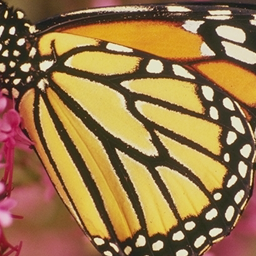

In [3]:
import requests
from PIL import Image

url = "https://huggingface.co/spaces/jjourney1125/swin2sr/resolve/main/samples/butterfly.jpg"

image = Image.open(requests.get(url, stream=True).raw)
image

## Prepare image using ImageProcessor

In [5]:
from transformers import Swin2SRImageProcessor 

processor = Swin2SRImageProcessor()

In [6]:
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 264, 264])


## Forward pass

In [7]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)

## Visualize

The model outputs an upscaled version of our input image.

In [8]:
outputs.reconstruction.shape

torch.Size([1, 3, 528, 528])

Let's visualize it!

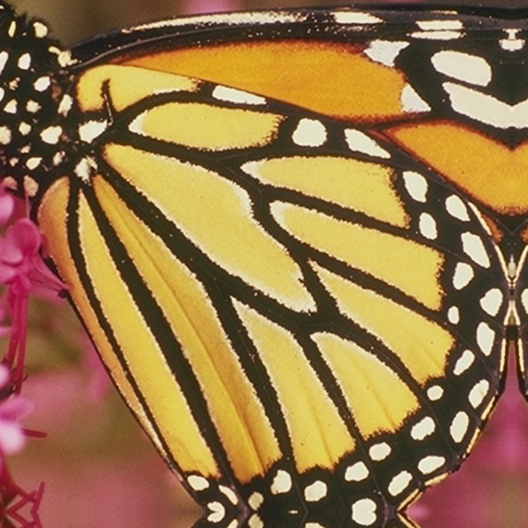

In [11]:
import numpy as np

output = outputs.reconstruction.data.squeeze().float().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)  # float32 to uint8
Image.fromarray(output)